# Reading Handwritten Digits using Classification

This project will be using the MNIST dataset, which comprises over 70,000 small images of handwritten digits. 

The MNIST is one of the most popular datasets. It is thus available on Scikit learn. 

The following code shows fetching the dataset.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Data on sci-kit learn will contain 
<ul>
<li>A descr key describing the dataset</li>
<li>A data key containing an array with one row per instance and one column per feature.
<li>A target key containing an array with labels</li>
</ul>

In [5]:
X,y = mnist["data"], mnist["target"]

print(X.shape,y.shape)

(70000, 784) (70000,)


The above cell shows the dataset has 70,000 instances, and each instance has 784 features. Why 784?

Each image has 28 by 28 pixels, which is equal to 784. Each feature is the intensity of a dataset.

To create an image, you have to grab the instance's feature vector, reshape it into a 28 by 28 arraym and display it using the matplotlib's <code>imshow()</code> function.

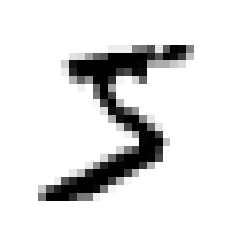

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

a_digit = X.iloc[0]

#reshape is called on the values attribute to retain the shape of the original series object.
a_digit_image = a_digit.values.reshape(28,28)

plt.imshow(a_digit_image,cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [28]:
y[0]

'5'

The image shown above looks like a 5. Indeed, looking at the label, we see that it is 5. Well then!

The label is a string, and we would like to work with integers. We thus cast it into an int.

In [29]:
import numpy as np


y = y.astype(np.uint8)

That was a general look. Remember we have to split the dataset into train and test sets before we begin looking closely into the data. 

In [30]:

#the first 60k instances are for training while the last 10k are for testing

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<strong>The dataset has already been shuffled. Thus, we are assured the cross validation sets will have one of every digit.</strong>

## Binary classification.

First, let us identify a single digit. We want to see if we can successfully discriminate 5 from other digits.

Thus, there will be two classes:

Five, and not five

In [31]:
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)

Next, we pick a classifier and train it. 

We first start with the <i>Schochastic Gradient Descent</i> classfier, which can be accessed using scikit learn's <code>SGDClassier</code>

The classifier can handle large dataset efficiently because it deals with training instances indipendently, one at a time. 

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_cl = SGDClassifier(random_state=42) #we set the random state so that we can have reproducible results

sgd_cl.fit(X_train.values,y_train_5)#use the array of values on the fit function rather than the pahdas dataframe. else you get a warning.

SGDClassifier(random_state=42)

Let us see whether it can predict the number 5

In [35]:
sgd_cl.predict([a_digit.values])#use the array of values dont provide column names. 

array([ True])

The model has correctly guessed that the digit represents a 5.

## Performance Measures

Evaluating a classifier is significantly trickier than evaluating a regressor. 

### Measuring Accuracy using Cross-Validation

Let us use the <code>cross_val_score()</code> to evaluate the <code>SGDClassifier</code> using K-fold cross vlidation with 3 folds.

In [36]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_cl,X_train.values,y_train_5.values,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

The models display a high accuracy. However, there is a small problem. since the true values are a small set of total dataset, then predicting not true will give us a higher accuracy even if the model is not predicting 5's correctly. 

### Confusion Matrix

The general idea of a confusion matrix is to count the number of times instances of class 'A' are classified as class 'B'. eg o know the nmber of times the classiier confused 5 with 3, look in the fifth row and 3rd column.

To compute the confusion matrix, you first need a set of predictions, so they can be coompared to the actual target. 

You can do that using the <code>cross_val_predict()</code> function.

In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_cl,X_train.values,y_train_5.values,cv=3)

Just like the <code>cross_val_score()</code> function, the <code>cross_val_predict()</code> function evaluates predictions with Kfold CV. 

However, the method does not return scores. rather, it returns the predictions made by the model for each instance. 

To get the confusion matrix, import the <code>confusion_matrix()</code> function, and pass it the target classes and the predicted classes.

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents a class, while the column represents a predicted class. 

The first row of this matrix considers non-5 image (negative), where 54k were correct. These are called true negatives. On the other hand, 687 of the numbers were wrongly classified as 5. These are the false positive. 

The second row consider the 5 images. (positive). There were 1900 5s that were classified as non five (false negative), while 3500 were correctly classified as  5 (true positive)


Thus, a perfect classifier has only true positives and true negatives with the other values as zero.

Presicion is the accuracy of true positive predictions

Recall is the ratio of true positive to all positive instances.





### Precision and Recall

Scikit learn provides several functions to compute classifier metrics. These also include precision and recall. 

In [45]:
from sklearn.metrics import precision_score, recall_score


print(f"Precision: {precision_score(y_train_5,y_train_pred)} \nRecall: {recall_score(y_train_5,y_train_pred)}")

Precision: 0.8370879772350012 
Recall: 0.6511713705958311


When the model positively identifies a 5, it is 83 % correct. Also, it only detects 65% of the fives in the dataset.

It is often convinient to comobine precision and recall into a single metric called the F1 score. F1 score is the harmonic mean of precision and recall. 

In [50]:
from sklearn.metrics import f1_score

f1s = f1_score(y_train_5,y_train_pred)

print(f"F1 Score:{f1s}")

F1 Score:0.7325171197343846


One problem with F1 score is that it likes when precision and recall are close together. However, these might not be the case for all classifiers.

Sometimes, we may want classifiers that have a high precision, even if it means low recall. eg a safe content for minors in a video platform.

at other times, we may want a classifier with a high recall rate, even if it means low precision eg an ai to catch shoplifers.

However, it is impossible to have a model with very high precision, and also high recall. There must be a tradeoff. 



#### Precision recall tradeoff